In [1]:
!python -m pip install pybrainlife

     |████████████████████████████████| 34.4 MB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 9.6 MB 90.5 MB/s eta 0:00:01
     |████████████████████████████████| 293 kB 103.9 MB/s eta 0:00:01
     |████████████████████████████████| 12.2 MB 104.7 MB/s eta 0:00:01
     |████████████████████████████████| 95 kB 5.5 MB/s s eta 0:00:01
     |████████████████████████████████| 11.6 MB 74.0 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 1.4 MB/s  eta 0:00:01
     |████████████████████████████████| 965 kB 98.6 MB/s eta 0:00:01
     |████████████████████████████████| 299 kB 102.6 MB/s eta 0:00:01
     |████████████████████████████████| 198 kB 105.5 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 94.9 MB/s eta 0:00:01
  Created wheel for bctpy: filename=bctpy-0.6.0-py3-none-any.whl size=102532 sha256=e1ccd9cb858061699acd9e9b1ecdc2d6ef79149a59d22348070bcfde381f1e08
  Stored in directory: /home/jovyan/.cache/pip/wheels/9c/3b/c3/3961c8f1e950ad9a58384d4a

In [5]:
import pandas as pd

In [2]:
from pybrainlife.data.collect import collect_data, collect_subject_data

In [62]:
# collect_subject_data(output data path)
subjects_data = collect_subject_data(dataPath="./")
subjects_data.rename(columns={'subject': 'subjectID','group': 'classID'},inplace=True)
subjects_data['colors'] = [ 'red' if f == 'FBL' else 'green'  if f == 'CC' else 'orange' for f in subjects_data['classID']]
subjects_data

,subjectID,classID,sex,handedness,mass,Total_Intracranial_Volume,Total_Graymatter_Volume,Total_Whitematter_Volume,Total_Cortical_Thickness,Left_Graymatter_Volume,Right_Graymatter_Volume,Left_Whitematter_Volume,Right_Whitematter_Volume,Left_Graymatter_Thickness,Right_Graymatter_Thickness,colors
0,1_001,FBL,M,R,235,1.637511e+06,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
1,1_002,FBL,M,R,190,1.620892e+06,538920.446638,508581.400156,2.55890,268863,268649,255139.852118,253441.548038,2.55890,2.55540,red
2,1_003,FBL,M,R,225,1.486703e+06,481683.539584,443059.221044,2.55749,241030,239550,221899.018540,221160.202505,2.55749,2.54579,red
3,1_005,FBL,M,R,225,1.766135e+06,546490.743019,522998.296841,2.40854,272175,273387,263955.468537,259042.828304,2.40854,2.42101,red
4,1_006,FBL,M,R,175,1.501255e+06,451403.507457,418691.091887,2.52702,228498,221947,211522.570047,207168.521840,2.52702,2.47761,red
5,1_007,FBL,M,R,182,1.545363e+06,469951.189186,450895.893416,2.47443,234533,235020,224923.658683,225972.234733,2.47443,2.45297,red
6,1_008,FBL,M,R,200,1.535631e+06,491118.497405,495762.455547,2.56984,246130,244120,249246.987839,246515.467709,2.56984,2.53309,red
7,1_009,FBL,M,R,300,1.764675e+06,573806.886775,482924.054938,2.60063,288389,284425,243948.299587,238975.755351,2.60063,2.60179,red
8,1_012,FBL,M,R,205,1.947375e+06,602409.407777,589975.068022,2.55313,301869,298913,295935.502056,294039.565966,2.55313,2.50006,red
9,1_013,FBL,M,R,310,1.642547e+06,532817.847862,464952.854084,2.59186,266636,264317,233320.971082,231631.883002,2.59186,2.55573,red


In [63]:
# collect_data(datatype name, list of datatype tags, list of object tags, filename, output file name, whether it's a network adjaceny matrix or not)
tractmeasures_df,_,_ = collect_data('neuro/tractmeasures',['profiles'],['notebook_example'],'tractmeasures.csv','tractmeasures.csv',net_adj=False)
tractmeasures_df = tractmeasures_df.merge(subjects_data,on='subjectID')
tractmeasures_df

,subjectID,structureID,nodeID,ad,ad_sd,ad_inverse_mean,ad_inverse_sd,fa,fa_sd,fa_inverse_mean,...,Total_Graymatter_Volume,Total_Whitematter_Volume,Total_Cortical_Thickness,Left_Graymatter_Volume,Right_Graymatter_Volume,Left_Whitematter_Volume,Right_Whitematter_Volume,Left_Graymatter_Thickness,Right_Graymatter_Thickness,colors
0,1_003,anterioFrontalCC,1,0.990636,0.133477,1.031185,0.144211,0.203855,0.061608,5.679472,...,481683.539584,443059.221044,2.55749,241030,239550,221899.01854,221160.202505,2.55749,2.54579,red
1,1_003,anterioFrontalCC,2,1.006484,0.136978,1.015576,0.146249,0.214398,0.064137,5.371425,...,481683.539584,443059.221044,2.55749,241030,239550,221899.01854,221160.202505,2.55749,2.54579,red
2,1_003,anterioFrontalCC,3,1.021448,0.140313,1.001190,0.147529,0.225834,0.067403,5.075145,...,481683.539584,443059.221044,2.55749,241030,239550,221899.01854,221160.202505,2.55749,2.54579,red
3,1_003,anterioFrontalCC,4,1.034780,0.143555,0.988792,0.148343,0.237844,0.071221,4.802729,...,481683.539584,443059.221044,2.55749,241030,239550,221899.01854,221160.202505,2.55749,2.54579,red
4,1_003,anterioFrontalCC,5,1.046271,0.146701,0.978424,0.149004,0.250029,0.075169,4.560413,...,481683.539584,443059.221044,2.55749,241030,239550,221899.01854,221160.202505,2.55749,2.54579,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109795,3_045,righttemporoThalamic,196,1.160854,0.287702,0.915912,0.203750,0.227596,0.111658,5.431755,...,555145.620200,483557.398968,2.59656,277695,275917,242970.37954,240587.019427,2.59656,2.60975,orange
109796,3_045,righttemporoThalamic,197,1.174354,0.305763,0.910795,0.212122,0.219099,0.111373,5.687029,...,555145.620200,483557.398968,2.59656,277695,275917,242970.37954,240587.019427,2.59656,2.60975,orange
109797,3_045,righttemporoThalamic,198,1.190319,0.325279,0.904451,0.220342,0.210487,0.111071,5.977404,...,555145.620200,483557.398968,2.59656,277695,275917,242970.37954,240587.019427,2.59656,2.60975,orange
109798,3_045,righttemporoThalamic,199,1.208989,0.344825,0.895955,0.226387,0.202194,0.110893,6.289714,...,555145.620200,483557.398968,2.59656,277695,275917,242970.37954,240587.019427,2.59656,2.60975,orange


In [20]:
import pybrainlife.data.manipulate as pybldm

In [64]:
# cut_nodes(dataframe, number of nodes, output directory, output file base name)
tractmeasures_cut = pybldm.cut_nodes(tractmeasures_df,180,'','')
# tractmeasures_cut = tractmeasures_cut.merge(subjects_data[['subjectID','classID']],on='subjectID')
tractmeasures_cut

,subjectID,structureID,nodeID,ad,ad_sd,ad_inverse_mean,ad_inverse_sd,fa,fa_sd,fa_inverse_mean,...,Total_Graymatter_Volume,Total_Whitematter_Volume,Total_Cortical_Thickness,Left_Graymatter_Volume,Right_Graymatter_Volume,Left_Whitematter_Volume,Right_Whitematter_Volume,Left_Graymatter_Thickness,Right_Graymatter_Thickness,colors
10,1_003,anterioFrontalCC,11,1.085195,0.164876,0.946422,0.155298,0.311869,0.091500,3.613084,...,481683.539584,443059.221044,2.55749,241030,239550,221899.01854,221160.202505,2.55749,2.54579,red
11,1_003,anterioFrontalCC,12,1.086980,0.164013,0.944526,0.153897,0.319690,0.092205,3.507559,...,481683.539584,443059.221044,2.55749,241030,239550,221899.01854,221160.202505,2.55749,2.54579,red
12,1_003,anterioFrontalCC,13,1.088640,0.161986,0.942467,0.151560,0.327383,0.092728,3.407173,...,481683.539584,443059.221044,2.55749,241030,239550,221899.01854,221160.202505,2.55749,2.54579,red
13,1_003,anterioFrontalCC,14,1.090442,0.159284,0.940194,0.148862,0.334810,0.093359,3.319931,...,481683.539584,443059.221044,2.55749,241030,239550,221899.01854,221160.202505,2.55749,2.54579,red
14,1_003,anterioFrontalCC,15,1.092515,0.156522,0.937667,0.146191,0.341992,0.094251,3.243157,...,481683.539584,443059.221044,2.55749,241030,239550,221899.01854,221160.202505,2.55749,2.54579,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109785,3_045,righttemporoThalamic,186,1.087962,0.177204,0.943968,0.138582,0.297040,0.117068,3.955868,...,555145.620200,483557.398968,2.59656,277695,275917,242970.37954,240587.019427,2.59656,2.60975,orange
109786,3_045,righttemporoThalamic,187,1.093049,0.183162,0.941090,0.142494,0.290522,0.116608,4.066973,...,555145.620200,483557.398968,2.59656,277695,275917,242970.37954,240587.019427,2.59656,2.60975,orange
109787,3_045,righttemporoThalamic,188,1.098402,0.190326,0.938410,0.147071,0.284019,0.116119,4.183322,...,555145.620200,483557.398968,2.59656,277695,275917,242970.37954,240587.019427,2.59656,2.60975,orange
109788,3_045,righttemporoThalamic,189,1.104156,0.198886,0.935774,0.152258,0.277575,0.115483,4.301211,...,555145.620200,483557.398968,2.59656,277695,275917,242970.37954,240587.019427,2.59656,2.60975,orange


In [65]:
# compute_mean_data(output directory, dataframe, output basename)
tractmeasures_cut_mean = pybldm.compute_mean_data('./',tractmeasures_cut,'tractmeasures_cut_mean')
tractmeasures_cut_mean = tractmeasures_cut_mean.merge(subjects_data[['subjectID','sex','handedness','colors']],on='subjectID')
tractmeasures_cut_mean

/opt/conda/lib/python3.9/site-packages/pybrainlife/data/manipulate.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_mean =  data.groupby(['subjectID','classID','structureID']).mean().reset_index()


,subjectID,classID,structureID,nodeID,ad,ad_sd,ad_inverse_mean,ad_inverse_sd,fa,fa_sd,...,Total_Cortical_Thickness,Left_Graymatter_Volume,Right_Graymatter_Volume,Left_Whitematter_Volume,Right_Whitematter_Volume,Left_Graymatter_Thickness,Right_Graymatter_Thickness,sex,handedness,colors
0,1_001,FBL,anterioFrontalCC,1,1.360051,0.200187,0.769157,0.099937,0.434496,0.131440,...,2.54607,252829.0,253655.0,226482.442757,225346.314703,2.54607,2.54544,M,R,red
1,1_001,FBL,forcepsMajor,1,1.421196,0.198930,0.723688,0.098614,0.619968,0.133076,...,2.54607,252829.0,253655.0,226482.442757,225346.314703,2.54607,2.54544,M,R,red
2,1_001,FBL,forcepsMinor,1,1.309140,0.182775,0.794148,0.098665,0.450354,0.121946,...,2.54607,252829.0,253655.0,226482.442757,225346.314703,2.54607,2.54544,M,R,red
3,1_001,FBL,leftAnterioFrontoCerebellar,1,1.141597,0.215825,0.919115,0.169924,0.475503,0.138428,...,2.54607,252829.0,253655.0,226482.442757,225346.314703,2.54607,2.54544,M,R,red
4,1_001,FBL,leftArc,1,1.122553,0.118781,0.904481,0.098794,0.437965,0.115683,...,2.54607,252829.0,253655.0,226482.442757,225346.314703,2.54607,2.54544,M,R,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,3_050,NonAth,rightmotorThalamic,1,1.076164,0.146665,0.951442,0.129205,0.448458,0.120323,...,2.51098,277795.0,275216.0,266152.460642,262597.132473,2.51098,2.51615,M,R,orange
545,3_050,NonAth,rightpArc,1,1.191548,0.123995,0.853232,0.088563,0.471350,0.085980,...,2.51098,277795.0,275216.0,266152.460642,262597.132473,2.51098,2.51615,M,R,orange
546,3_050,NonAth,rightparietoThalamic,1,1.175295,0.168816,0.876675,0.126859,0.475773,0.113685,...,2.51098,277795.0,275216.0,266152.460642,262597.132473,2.51098,2.51615,M,R,orange
547,3_050,NonAth,rightspinoThalamic,1,1.014552,0.185252,1.018930,0.166962,0.381391,0.143852,...,2.51098,277795.0,275216.0,266152.460642,262597.132473,2.51098,2.51615,M,R,orange


In [55]:
import pybrainlife.vis.plots as pyblvp

anterioFrontalCC
fa


/opt/conda/lib/python3.9/site-packages/pybrainlife/vis/plots.py:370: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y = stat[stat['classID'] == stat.classID.unique()[g]].groupby(['structureID','nodeID']).mean()[dm][t]
/opt/conda/lib/python3.9/site-packages/pybrainlife/vis/plots.py:380: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  err = stat[stat['classID'] == stat.classID.unique()[g]].groupby(['structureID','nodeID']).std()[dm][t] / np.sqrt(len(stat[stat['classID'] == stat.classID.unique()[g]]['subjectID'].unique()))
/opt/conda/lib/python3.9/site-packages/pybrainlife/vis/plots.py:370: FutureWarning: The defa

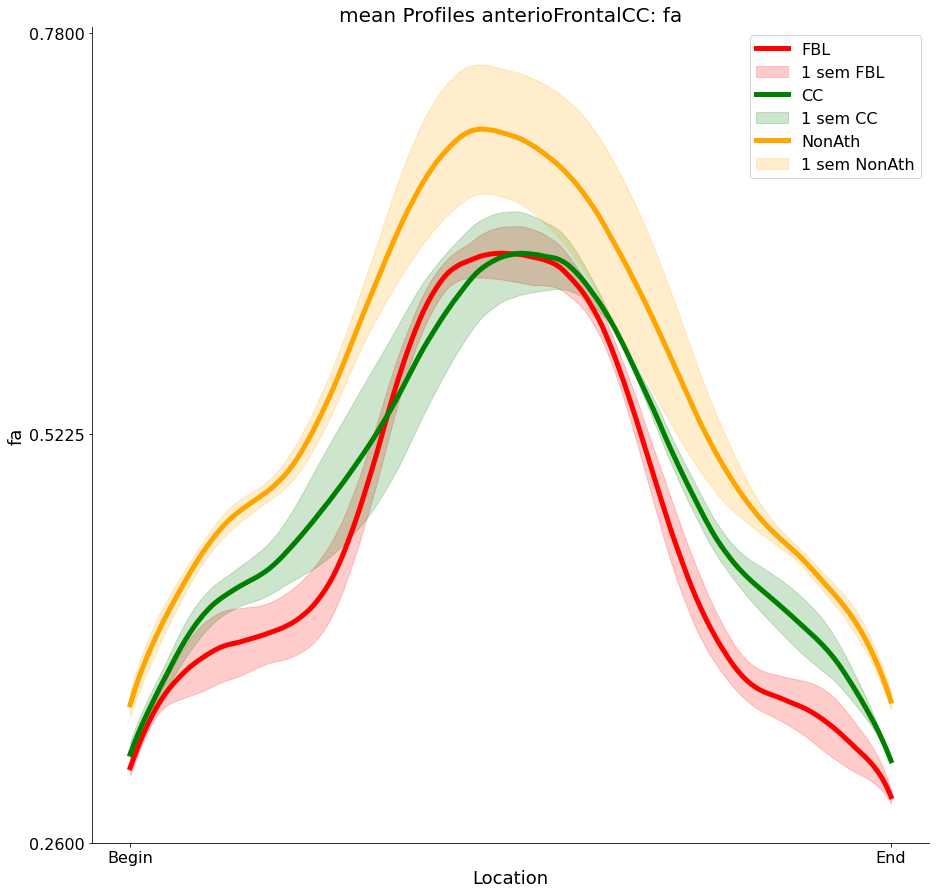

In [98]:
# plot_profiles(list of structure names, dataframe, list of measures to make plot for, 
# summary method: 'mean','max','min'; error bars: 'sd' or 'sem'; output folder, output file name)
pyblvp.plot_profiles(['anterioFrontalCC'],tractmeasures_cut,['fa'],'mean','sem','','')

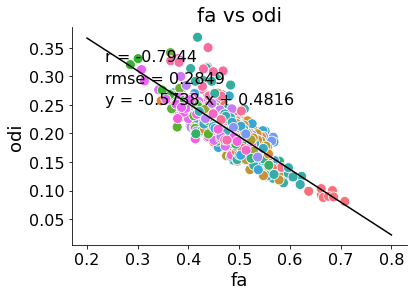

In [70]:
# singleplot_scatter(dictionary of subject colors (just leave as empty string), 
# x-axis dataframe, y-axis dataframe, x-axis measure, y-axis measure, log x axis (true or false), 
# legend measure, measure to color dots based on, how to summarize data (ravel, average, append), 
# linear regression or equality line, set opactiy based on distance from line of regression, 
# compute slope or use slope of 1, shuffle data, output folder, output file name)
pyblvp.singleplot_scatter('',tractmeasures_cut_mean,tractmeasures_cut_mean,'fa','odi',False,'structureID','structureID','ravel','linreg',False,False,False,'','','')

In [78]:
cortex_df,_,_ = collect_data('neuro/parc-stats',['cortex_mapping_stats'],['notebook_example'],'parc-stats/cortex.csv','cortex.csv',net_adj=False)
cortex_df = cortex_df.merge(subjects_data,on='subjectID')
cortex_df = cortex_df.sort_values(by=['subjectID','structureID','parcellationID'])
cortex_df

,subjectID,structureID,parcellationID,md,snr,ad,goodvertex,rd,ndi,isovf,...,Total_Graymatter_Volume,Total_Whitematter_Volume,Total_Cortical_Thickness,Left_Graymatter_Volume,Right_Graymatter_Volume,Left_Whitematter_Volume,Right_Whitematter_Volume,Left_Graymatter_Thickness,Right_Graymatter_Thickness,colors
897,1_001,lh_G_Ins_lg_and_S_cent_ins,aparc.a2009s,1.0338,30.6692,1.1442,1.0000,0.9786,0.2567,0.1581,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
886,1_001,lh_G_and_S_cingul-Ant,aparc.a2009s,0.9944,26.6948,1.0861,0.9973,0.9485,0.2175,0.1155,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
887,1_001,lh_G_and_S_cingul-Mid-Ant,aparc.a2009s,1.1978,27.3097,1.2805,1.0000,1.1565,0.2419,0.2556,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
888,1_001,lh_G_and_S_cingul-Mid-Post,aparc.a2009s,1.0254,28.9323,1.1065,1.0000,0.9848,0.2605,0.1628,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
882,1_001,lh_G_and_S_occipital_inf,aparc.a2009s,1.1236,27.2247,1.1888,0.9757,1.0910,0.3004,0.2384,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,3_050,rh_supramarginal,aparc,0.9956,94.7648,1.0816,1.0000,0.9526,0.2511,0.1362,...,554642.302719,528749.593114,2.51098,277795,275216,266152.460642,262597.132473,2.51098,2.51615,orange
2173,3_050,rh_supramarginal,aparc.DKTatlas,0.9990,94.8601,1.0853,1.0000,0.9559,0.2520,0.1389,...,554642.302719,528749.593114,2.51098,277795,275216,266152.460642,262597.132473,2.51098,2.51615,orange
1967,3_050,rh_temporalpole,aparc,1.0929,38.6182,1.1839,1.0000,1.0475,0.3167,0.2196,...,554642.302719,528749.593114,2.51098,277795,275216,266152.460642,262597.132473,2.51098,2.51615,orange
1968,3_050,rh_transversetemporal,aparc,1.2489,59.4777,1.3253,1.0000,1.2106,0.3360,0.3234,...,554642.302719,528749.593114,2.51098,277795,275216,266152.460642,262597.132473,2.51098,2.51615,orange


In [95]:
cortex_df_destrieux = cortex_df.loc[cortex_df['parcellationID'] == 'aparc.a2009s']
cortex_df_destrieux

,subjectID,structureID,parcellationID,md,snr,ad,goodvertex,rd,ndi,isovf,...,Total_Graymatter_Volume,Total_Whitematter_Volume,Total_Cortical_Thickness,Left_Graymatter_Volume,Right_Graymatter_Volume,Left_Whitematter_Volume,Right_Whitematter_Volume,Left_Graymatter_Thickness,Right_Graymatter_Thickness,colors
897,1_001,lh_G_Ins_lg_and_S_cent_ins,aparc.a2009s,1.0338,30.6692,1.1442,1.0000,0.9786,0.2567,0.1581,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
886,1_001,lh_G_and_S_cingul-Ant,aparc.a2009s,0.9944,26.6948,1.0861,0.9973,0.9485,0.2175,0.1155,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
887,1_001,lh_G_and_S_cingul-Mid-Ant,aparc.a2009s,1.1978,27.3097,1.2805,1.0000,1.1565,0.2419,0.2556,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
888,1_001,lh_G_and_S_cingul-Mid-Post,aparc.a2009s,1.0254,28.9323,1.1065,1.0000,0.9848,0.2605,0.1628,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
882,1_001,lh_G_and_S_occipital_inf,aparc.a2009s,1.1236,27.2247,1.1888,0.9757,1.0910,0.3004,0.2384,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,3_050,rh_S_suborbital,aparc.a2009s,0.8781,52.5180,0.9602,1.0000,0.8371,0.2438,0.0581,...,554642.302719,528749.593114,2.51098,277795,275216,266152.460642,262597.132473,2.51098,2.51615,orange
2112,3_050,rh_S_subparietal,aparc.a2009s,0.9431,74.8511,1.0405,1.0000,0.8944,0.2718,0.1190,...,554642.302719,528749.593114,2.51098,277795,275216,266152.460642,262597.132473,2.51098,2.51615,orange
2113,3_050,rh_S_temporal_inf,aparc.a2009s,0.8964,72.3387,0.9804,1.0000,0.8545,0.2623,0.0813,...,554642.302719,528749.593114,2.51098,277795,275216,266152.460642,262597.132473,2.51098,2.51615,orange
2114,3_050,rh_S_temporal_sup,aparc.a2009s,0.9348,88.8916,1.0122,1.0000,0.8962,0.2559,0.1026,...,554642.302719,528749.593114,2.51098,277795,275216,266152.460642,262597.132473,2.51098,2.51615,orange


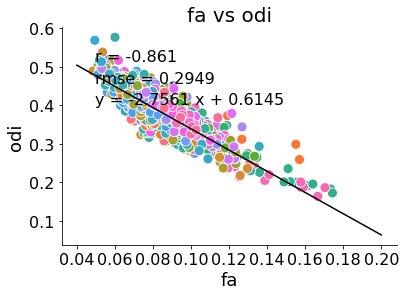

In [96]:
# singleplot_scatter(dictionary of subject colors (just leave as empty string), 
# x-axis dataframe, y-axis dataframe, x-axis measure, y-axis measure, log x axis (true or false), 
# legend measure, measure to color dots based on, how to summarize data (ravel, average, append), 
# linear regression or equality line, set opactiy based on distance from line of regression, 
# compute slope or use slope of 1, shuffle data, output folder, output file name)
pyblvp.singleplot_scatter('',cortex_df_destrieux,cortex_df_destrieux,'fa','odi',False,'structureID','structureID','ravel','linreg',False,False,False,'','','')